In [1]:
import keras

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
from PIL import Image

In [4]:
import matplotlib.pyplot as plt

In [5]:
def test_pattern(size, r_offset, c_offset):
    pattern = np.zeros(shape=(size, size))
    forward = np.arange(0, size)
    backward = forward[::-1].copy()
    row_wrap = lambda arr: (arr + r_offset) % size
    col_wrap = lambda arr: (arr + c_offset) % size
    pattern[row_wrap(forward), col_wrap(forward)] = 1
    pattern[row_wrap(forward), col_wrap(backward)] = 2
    return pattern

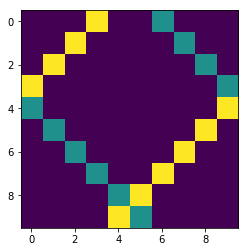

In [6]:
plt.imshow(test_pattern(10, 4, 0))

In [7]:
def blur(pattern, sigma=0.5):
    from scipy.ndimage import gaussian_filter
    return gaussian_filter(pattern, sigma, mode='constant')

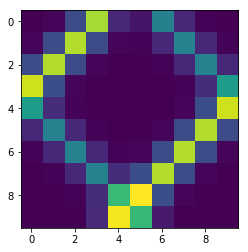

In [8]:
plt.imshow(blur(test_pattern(10, 4, 0)))

In [9]:
batch_size = 1
rows = 10
cols = 10
size = 10
channels = 1

In [10]:
def get_reshaper(batch_size, rows, cols, channels):
    def reshaper(array):
        return array.reshape(batch_size, rows, cols, channels)
    return reshaper

In [11]:
reshaper = get_reshaper(batch_size, rows, cols, channels)

In [12]:
reshaper(test_pattern(size, 0, 0))[..., 0]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [0., 1., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 1., 0., 0., 0., 0., 2., 0., 0.],
        [0., 0., 0., 1., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 1., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 1., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 1., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])

In [13]:
def concat_patterns(size, pattern_fn, reshaper):
    offsets = range(size//2 + 1)
    return np.concatenate([reshaper(pattern_fn(size, r, c)) for r in offsets for c in offsets])

In [14]:
training_inputs = concat_patterns(size, test_pattern, reshaper)
blurred_pattern = lambda *args: blur(test_pattern(*args))
training_outputs = concat_patterns(size, blurred_pattern, reshaper)

In [15]:
training_inputs.shape

(36, 10, 10, 1)

In [16]:
training_inputs.shape == training_outputs.shape

True

In [17]:
def imshow_multi(*images, image_slice=...):
    plt.figure(figsize=(120, 40))
    for idx, image in enumerate(images):
        plt.subplot(1, len(image), idx+1)
        plt.imshow(image[image_slice])
    plt.show()

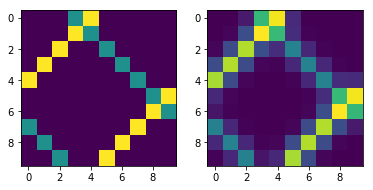

In [18]:
imshow_multi(training_inputs, training_outputs, image_slice=(10, ..., 0))

In [19]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D 

In [20]:
def create_blurring_model (size, channels=1):
    model = Sequential()
    convolution = Conv2D(filters=1, kernel_size=5,
                         padding='same',
                         data_format='channels_last',
                         input_shape=(size, size, channels),
                         name='Convolution'
                        )
    model.add(convolution)
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

In [21]:
model = create_blurring_model(size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 10, 10, 1)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.utils import plot_model
plot_model(model, to_file='keras.png', show_shapes=True, show_layer_names=True)

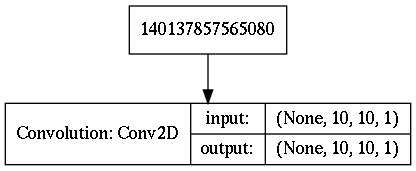

In [23]:
Image.open('keras.png')

In [24]:
initial_outputs = model.predict(training_outputs)

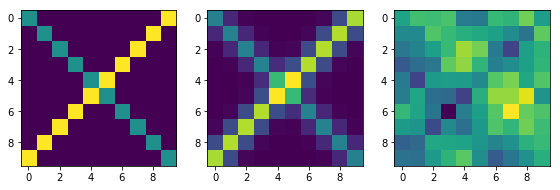

In [25]:
imshow_multi(training_inputs, training_outputs, initial_outputs, image_slice=(0, ..., 0))

In [26]:
model.fit(training_inputs, training_outputs)

Epoch 1/1
36/36 [==============================] - 0s 3ms/step - loss: 0.5240


In [27]:
fitting = model.fit(training_inputs, training_outputs, epochs=1000);

Epoch 1/1000
36/36 [==============================] - 0s 257us/step - loss: 0.4815
Epoch 2/1000
36/36 [==============================] - 0s 316us/step - loss: 0.4440
Epoch 3/1000
36/36 [==============================] - 0s 208us/step - loss: 0.4111
Epoch 4/1000
36/36 [==============================] - 0s 199us/step - loss: 0.3820
Epoch 5/1000
36/36 [==============================] - 0s 316us/step - loss: 0.3566
Epoch 6/1000
36/36 [==============================] - 0s 179us/step - loss: 0.3341
Epoch 7/1000
36/36 [==============================] - 0s 183us/step - loss: 0.3141
Epoch 8/1000
36/36 [==============================] - 0s 371us/step - loss: 0.2962
Epoch 9/1000
36/36 [==============================] - 0s 278us/step - loss: 0.2797
Epoch 10/1000
36/36 [==============================] - 0s 203us/step - loss: 0.2647
Epoch 11/1000
36/36 [==============================] - 0s 212us/step - loss: 0.2513
Epoch 12/1000
36/36 [==============================] - 0s 265us/step - loss: 0.2391
E

36/36 [==============================] - 0s 234us/step - loss: 0.0307
Epoch 99/1000
36/36 [==============================] - 0s 314us/step - loss: 0.0303
Epoch 100/1000
36/36 [==============================] - 0s 175us/step - loss: 0.0298
Epoch 101/1000
36/36 [==============================] - 0s 281us/step - loss: 0.0293
Epoch 102/1000
36/36 [==============================] - 0s 349us/step - loss: 0.0289
Epoch 103/1000
36/36 [==============================] - 0s 206us/step - loss: 0.0284
Epoch 104/1000
36/36 [==============================] - 0s 157us/step - loss: 0.0280
Epoch 105/1000
36/36 [==============================] - 0s 704us/step - loss: 0.0276
Epoch 106/1000
36/36 [==============================] - 0s 536us/step - loss: 0.0272
Epoch 107/1000
36/36 [==============================] - 0s 409us/step - loss: 0.0267
Epoch 108/1000
36/36 [==============================] - 0s 485us/step - loss: 0.0263
Epoch 109/1000
36/36 [==============================] - 0s 286us/step - loss: 0.0

36/36 [==============================] - 0s 190us/step - loss: 0.0091
Epoch 195/1000
36/36 [==============================] - 0s 165us/step - loss: 0.0090
Epoch 196/1000
36/36 [==============================] - 0s 197us/step - loss: 0.0089
Epoch 197/1000
36/36 [==============================] - 0s 234us/step - loss: 0.0088
Epoch 198/1000
36/36 [==============================] - 0s 213us/step - loss: 0.0087
Epoch 199/1000
36/36 [==============================] - 0s 231us/step - loss: 0.0087
Epoch 200/1000
36/36 [==============================] - 0s 441us/step - loss: 0.0086
Epoch 201/1000
36/36 [==============================] - 0s 558us/step - loss: 0.0085
Epoch 202/1000
36/36 [==============================] - 0s 213us/step - loss: 0.0084
Epoch 203/1000
36/36 [==============================] - 0s 162us/step - loss: 0.0083
Epoch 204/1000
36/36 [==============================] - 0s 100us/step - loss: 0.0082
Epoch 205/1000
36/36 [==============================] - 0s 104us/step - loss: 0.

36/36 [==============================] - 0s 341us/step - loss: 0.0042
Epoch 291/1000
36/36 [==============================] - 0s 293us/step - loss: 0.0041
Epoch 292/1000
36/36 [==============================] - 0s 230us/step - loss: 0.0041
Epoch 293/1000
36/36 [==============================] - 0s 233us/step - loss: 0.0041
Epoch 294/1000
36/36 [==============================] - 0s 264us/step - loss: 0.0041
Epoch 295/1000
36/36 [==============================] - 0s 289us/step - loss: 0.0040
Epoch 296/1000
36/36 [==============================] - 0s 168us/step - loss: 0.0040
Epoch 297/1000
36/36 [==============================] - 0s 387us/step - loss: 0.0040
Epoch 298/1000
36/36 [==============================] - 0s 197us/step - loss: 0.0040
Epoch 299/1000
36/36 [==============================] - 0s 319us/step - loss: 0.0039
Epoch 300/1000
36/36 [==============================] - 0s 324us/step - loss: 0.0039
Epoch 301/1000
36/36 [==============================] - 0s 202us/step - loss: 0.

36/36 [==============================] - 0s 190us/step - loss: 0.0024
Epoch 387/1000
36/36 [==============================] - 0s 200us/step - loss: 0.0024
Epoch 388/1000
36/36 [==============================] - 0s 255us/step - loss: 0.0024
Epoch 389/1000
36/36 [==============================] - 0s 225us/step - loss: 0.0024
Epoch 390/1000
36/36 [==============================] - 0s 172us/step - loss: 0.0024
Epoch 391/1000
36/36 [==============================] - 0s 229us/step - loss: 0.0023
Epoch 392/1000
36/36 [==============================] - 0s 254us/step - loss: 0.0023
Epoch 393/1000
36/36 [==============================] - 0s 255us/step - loss: 0.0023
Epoch 394/1000
36/36 [==============================] - 0s 330us/step - loss: 0.0023
Epoch 395/1000
36/36 [==============================] - 0s 208us/step - loss: 0.0023
Epoch 396/1000
36/36 [==============================] - 0s 493us/step - loss: 0.0023
Epoch 397/1000
36/36 [==============================] - 0s 276us/step - loss: 0.

36/36 [==============================] - 0s 407us/step - loss: 0.0015
Epoch 483/1000
36/36 [==============================] - 0s 504us/step - loss: 0.0015
Epoch 484/1000
36/36 [==============================] - 0s 256us/step - loss: 0.0015
Epoch 485/1000
36/36 [==============================] - 0s 308us/step - loss: 0.0015
Epoch 486/1000
36/36 [==============================] - 0s 332us/step - loss: 0.0015
Epoch 487/1000
36/36 [==============================] - 0s 234us/step - loss: 0.0015
Epoch 488/1000
36/36 [==============================] - 0s 307us/step - loss: 0.0015
Epoch 489/1000
36/36 [==============================] - 0s 218us/step - loss: 0.0015
Epoch 490/1000
36/36 [==============================] - 0s 224us/step - loss: 0.0015
Epoch 491/1000
36/36 [==============================] - 0s 220us/step - loss: 0.0015
Epoch 492/1000
36/36 [==============================] - 0s 292us/step - loss: 0.0014
Epoch 493/1000
36/36 [==============================] - 0s 367us/step - loss: 0.

36/36 [==============================] - 0s 237us/step - loss: 0.0010
Epoch 579/1000
36/36 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 580/1000
36/36 [==============================] - 0s 129us/step - loss: 0.0010
Epoch 581/1000
36/36 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 582/1000
36/36 [==============================] - 0s 196us/step - loss: 9.9911e-04
Epoch 583/1000
36/36 [==============================] - 0s 173us/step - loss: 9.9551e-04
Epoch 584/1000
36/36 [==============================] - 0s 203us/step - loss: 9.9143e-04
Epoch 585/1000
36/36 [==============================] - 0s 166us/step - loss: 9.8787e-04
Epoch 586/1000
36/36 [==============================] - 0s 149us/step - loss: 9.8360e-04
Epoch 587/1000
36/36 [==============================] - 0s 210us/step - loss: 9.7958e-04
Epoch 588/1000
36/36 [==============================] - 0s 190us/step - loss: 9.7566e-04
Epoch 589/1000
36/36 [==============================

36/36 [==============================] - 0s 187us/step - loss: 7.0879e-04
Epoch 671/1000
36/36 [==============================] - 0s 297us/step - loss: 7.0619e-04
Epoch 672/1000
36/36 [==============================] - 0s 202us/step - loss: 7.0380e-04
Epoch 673/1000
36/36 [==============================] - 0s 174us/step - loss: 7.0136e-04
Epoch 674/1000
36/36 [==============================] - 0s 297us/step - loss: 6.9852e-04
Epoch 675/1000
36/36 [==============================] - 0s 274us/step - loss: 6.9592e-04
Epoch 676/1000
36/36 [==============================] - 0s 236us/step - loss: 6.9355e-04
Epoch 677/1000
36/36 [==============================] - 0s 230us/step - loss: 6.9089e-04
Epoch 678/1000
36/36 [==============================] - 0s 381us/step - loss: 6.8817e-04
Epoch 679/1000
36/36 [==============================] - 0s 337us/step - loss: 6.8564e-04
Epoch 680/1000
36/36 [==============================] - 0s 338us/step - loss: 6.8303e-04
Epoch 681/1000
36/36 [==============

36/36 [==============================] - 0s 260us/step - loss: 5.0764e-04
Epoch 763/1000
36/36 [==============================] - 0s 203us/step - loss: 5.0591e-04
Epoch 764/1000
36/36 [==============================] - 0s 208us/step - loss: 5.0426e-04
Epoch 765/1000
36/36 [==============================] - 0s 254us/step - loss: 5.0247e-04
Epoch 766/1000
36/36 [==============================] - 0s 230us/step - loss: 5.0092e-04
Epoch 767/1000
36/36 [==============================] - 0s 202us/step - loss: 4.9912e-04
Epoch 768/1000
36/36 [==============================] - 0s 375us/step - loss: 4.9735e-04
Epoch 769/1000
36/36 [==============================] - 0s 327us/step - loss: 4.9576e-04
Epoch 770/1000
36/36 [==============================] - 0s 440us/step - loss: 4.9407e-04
Epoch 771/1000
36/36 [==============================] - 0s 292us/step - loss: 4.9247e-04
Epoch 772/1000
36/36 [==============================] - 0s 292us/step - loss: 4.9073e-04
Epoch 773/1000
36/36 [==============

36/36 [==============================] - 0s 156us/step - loss: 3.6884e-04
Epoch 855/1000
36/36 [==============================] - 0s 296us/step - loss: 3.6757e-04
Epoch 856/1000
36/36 [==============================] - 0s 202us/step - loss: 3.6627e-04
Epoch 857/1000
36/36 [==============================] - 0s 246us/step - loss: 3.6504e-04
Epoch 858/1000
36/36 [==============================] - 0s 221us/step - loss: 3.6392e-04
Epoch 859/1000
36/36 [==============================] - 0s 306us/step - loss: 3.6260e-04
Epoch 860/1000
36/36 [==============================] - 0s 402us/step - loss: 3.6141e-04
Epoch 861/1000
36/36 [==============================] - 0s 383us/step - loss: 3.6018e-04
Epoch 862/1000
36/36 [==============================] - 0s 544us/step - loss: 3.5893e-04
Epoch 863/1000
36/36 [==============================] - 0s 299us/step - loss: 3.5771e-04
Epoch 864/1000
36/36 [==============================] - 0s 322us/step - loss: 3.5644e-04
Epoch 865/1000
36/36 [==============

36/36 [==============================] - 0s 249us/step - loss: 2.7101e-04
Epoch 947/1000
36/36 [==============================] - 0s 270us/step - loss: 2.7006e-04
Epoch 948/1000
36/36 [==============================] - 0s 195us/step - loss: 2.6919e-04
Epoch 949/1000
36/36 [==============================] - 0s 280us/step - loss: 2.6825e-04
Epoch 950/1000
36/36 [==============================] - 0s 373us/step - loss: 2.6734e-04
Epoch 951/1000
36/36 [==============================] - 0s 245us/step - loss: 2.6647e-04
Epoch 952/1000
36/36 [==============================] - 0s 281us/step - loss: 2.6562e-04
Epoch 953/1000
36/36 [==============================] - 0s 197us/step - loss: 2.6477e-04
Epoch 954/1000
36/36 [==============================] - 0s 208us/step - loss: 2.6382e-04
Epoch 955/1000
36/36 [==============================] - 0s 250us/step - loss: 2.6299e-04
Epoch 956/1000
36/36 [==============================] - 0s 278us/step - loss: 2.6213e-04
Epoch 957/1000
36/36 [==============

In [28]:
final_outputs = model.predict(training_inputs)

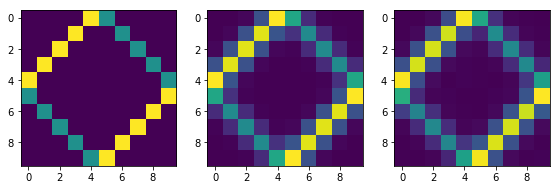

In [29]:
imshow_multi(training_inputs, training_outputs, final_outputs, image_slice=(30, ..., 0))

ValueError: num must be 1 <= num <= 1, not 2

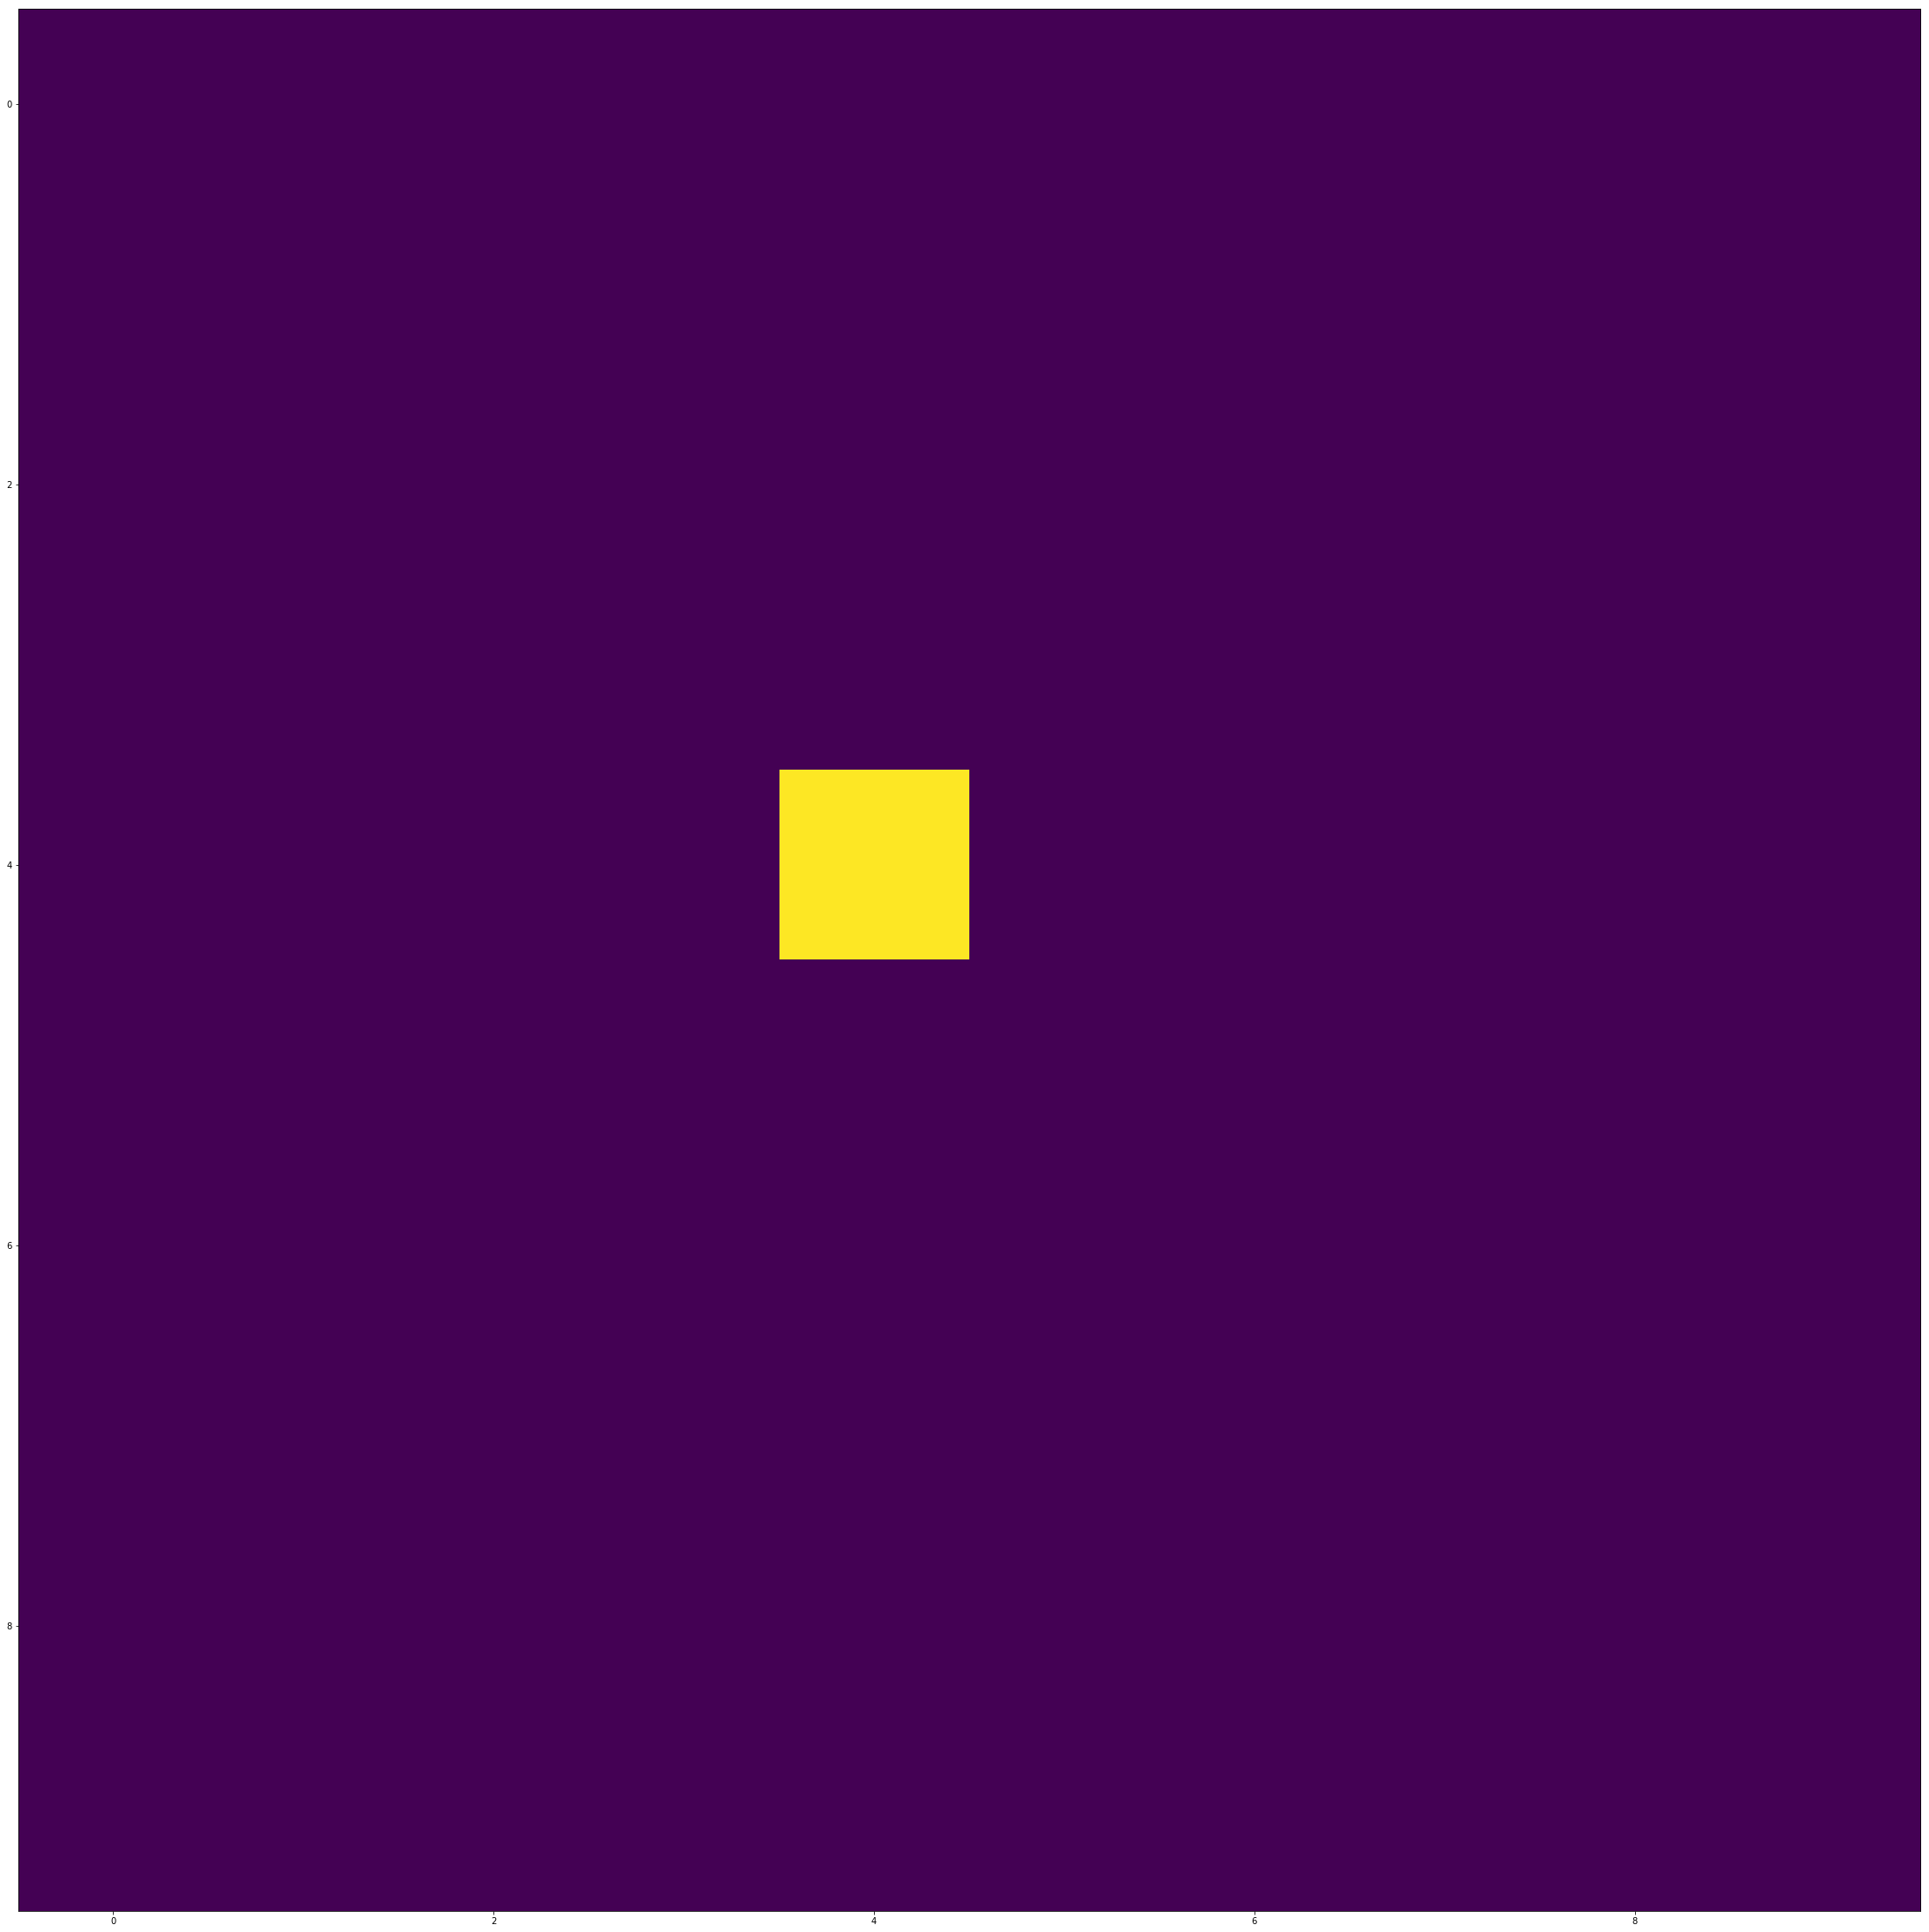

In [30]:
test = np.zeros(shape=(1, size, size, 1))
test[0, 4, 4, 0] = 1
imshow_multi(test, model.predict(test), image_slice=(0, ..., 0))

In [ ]:
model.layers[0]